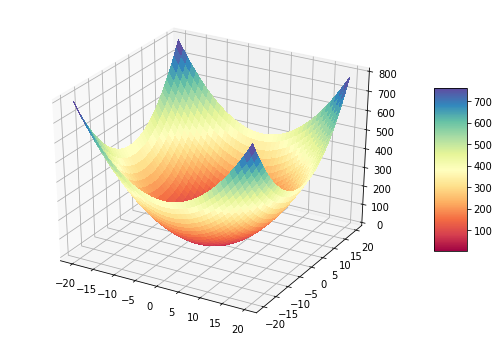

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


def plot_3d():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(-20, 20, 0.25)
    Y = np.arange(-20, 20, 0.25)
    X, Y = np.meshgrid(X, Y)
    
    Z = X*X + Y*Y

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,
                                   linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

if __name__=="__main__":
    plot_3d()

In [4]:
# Chương trình cài đặt với mục đích dễ hiểu
# Nhiều chỗ có thể cải tiến về mặt computation và memory

import random

size_of_individual = 5
size_of_population = 100
n_generations = 100


losses = []

def generate_random_value(bound = 10):
    return (random.random()*2 - 1)*bound

def score_fitness(individual): # cost
    return sum(val*val for val in individual)

def create_individual():
    return [generate_random_value() for _ in range(size_of_individual)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(size_of_individual):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(size_of_individual):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):
    
    index1 = random.randint(0, size_of_population-1)    
    while True:
        index2 = random.randint(0, size_of_population-1)    
        if (index2 != index1):
            break
            
    individual_s = sorted_old_population[index1]
    if index2 < index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 

def create_new_population(old_population, elitism=0, gen=1):
    sorted_population = sorted(old_population,key=score_fitness)
        
    if gen%1 == 0:
        losses.append(score_fitness(sorted_population[0]))
        print("BEST:", score_fitness(sorted_population[0]))
    
    new_population = sorted_population[:elitism]   
    
    while len(new_population) < size_of_population:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)
            
    return new_population


population = [create_individual() for _ in range(size_of_population)]

for i in range(n_generations):
    population = create_new_population(population, 2, i)

BEST: 29.00728316973806
BEST: 17.445197496252003
BEST: 17.445197496252003
BEST: 8.247554517748199
BEST: 5.983777090108044
BEST: 3.2763487276130325
BEST: 3.003069580858249
BEST: 3.003069580858249
BEST: 3.003069580858249
BEST: 0.8793381807525285
BEST: 0.8793381807525285
BEST: 0.8793381807525285
BEST: 0.8793381807525285
BEST: 0.8388736248775481
BEST: 0.47058761028533846
BEST: 0.47058761028533846
BEST: 0.47058761028533846
BEST: 0.47058761028533846
BEST: 0.41487391290207454
BEST: 0.41487391290207454
BEST: 0.3052175048773038
BEST: 0.3052175048773038
BEST: 0.3052175048773038
BEST: 0.3052175048773038
BEST: 0.3052175048773038
BEST: 0.275030346095415
BEST: 0.275030346095415
BEST: 0.275030346095415
BEST: 0.275030346095415
BEST: 0.275030346095415
BEST: 0.275030346095415
BEST: 0.275030346095415
BEST: 0.275030346095415
BEST: 0.24986739162825244
BEST: 0.24986739162825244
BEST: 0.24986739162825244
BEST: 0.24986739162825244
BEST: 0.24986739162825244
BEST: 0.24986739162825244
BEST: 0.24986739162825244
B

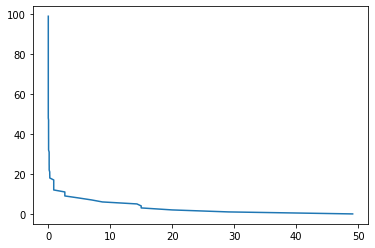

In [3]:
import matplotlib.pyplot as plt

x_axis = list(range(len(losses)))
plt.plot(losses, x_axis)
plt.show()